<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


Nesta tarefa, você se concentrará na visualização de dados.

O conjunto de dados será apresentado a você na forma de um RDBMS.

Você terá que usar consultas SQL para extrair os dados.


## Objectives


In this lab you will perform the following:


- Visualize a distribuição de dados.

- Visualize a relação entre dois recursos.

- Visualize a composição dos dados.

- Visualize a comparação de dados.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-01-15 12:42:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... failed: Name or service not known.
wget: unable to resolve host address ‘cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud’


Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

How many respondents indicated that they currently work with 'SQL'? 


In [ ]:
QUERY = """
SELECT count(*)
FROM master as m join LanguageWorkedWith as l 
on m.respondent = l.respondent
where LanguageWorkedWith like 'SQL'
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,count(*)
0,7106


How many respondents indicated that they work on 'MySQL' only? 

In [ ]:
QUERY = """
SELECT count(*)
FROM master as m join DatabaseWorkedWith as d
on m.respondent = d.respondent
where DatabaseWorkedWith = 'MySQL' 
and d.respondent not in (SELECT distinct respondent
FROM DatabaseWorkedWith
where DatabaseWorkedWith not like 'MySQL')
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,count(*)
0,474


In [ ]:
QUERY = """
SELECT  count(*), d.DevType
FROM master as m join DevType as d
on m.respondent = d.respondent
where DevType like 'Devel%' 
group by d.DevType
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head(500)


,count(*),DevType
0,911,"Developer, QA or test"
1,6290,"Developer, back-end"
2,2575,"Developer, desktop or enterprise applications"
3,854,"Developer, embedded applications or devices"
4,3920,"Developer, front-end"
5,6928,"Developer, full-stack"
6,472,"Developer, game or graphics"
7,1959,"Developer, mobile"


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


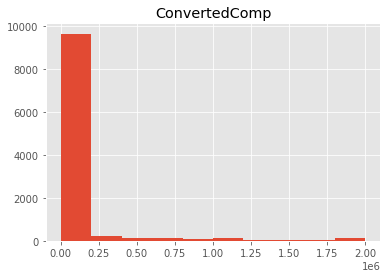

In [ ]:
# your code goes here


# your code goes here
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


mpl.style.use('ggplot') # optional: for ggplot-like style

table_name = 'ConvertedComp'

QUERY = """
SELECT {} as ConvertedComp
FROM master
""".format(table_name)

dfh = pd.read_sql_query(QUERY,conn)
dfh.hist(bins=10)
plt.show()



### Box Plots


Plot a box plot of `Age.`


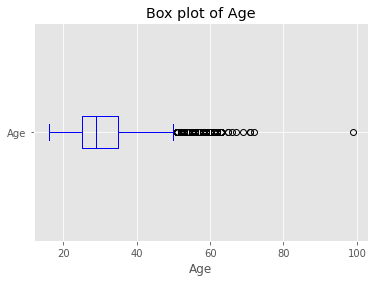

In [ ]:
table_name = 'Age'

QUERY = """
SELECT {} as Age
FROM master
""".format(table_name)

dfa = pd.read_sql_query(QUERY,conn)
dfa.boxplot(color='blue', vert=False)
plt.title("Box plot of Age")
plt.xlabel("Age")
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


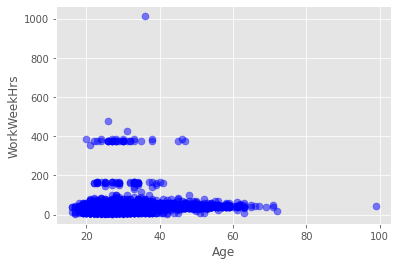

In [ ]:
# your code goes here

QUERY = """
SELECT Age,ConvertedComp,WorkWeekHrs,CodeRevHrs,MainBranch
FROM master
"""

df=pd.read_sql_query(QUERY,conn)
df
df.plot(kind='scatter', x='Age', y='WorkWeekHrs',s = 50, alpha=0.5, color='blue')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


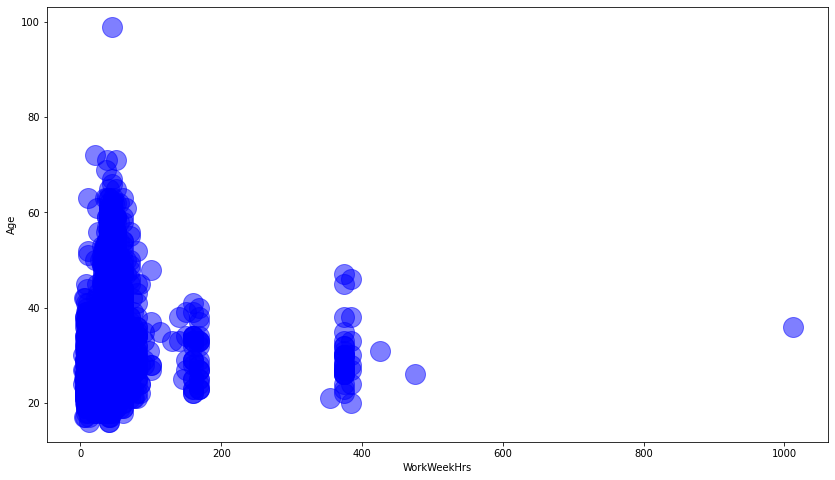

In [ ]:
# your code goes here

QUERY = """

SELECT Age,WorkWeekHrs,CodeRevHrs

FROM master

"""

df=pd.read_sql_query(QUERY,conn)
df.plot(kind='scatter', x='WorkWeekHrs', y='Age',s = 400,  figsize=(14, 8), alpha=0.5, color='blue')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


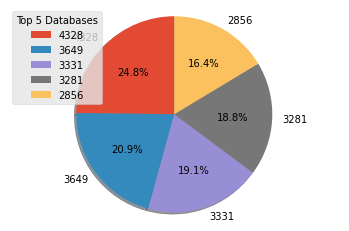

                        Count
DatabaseDesireNextYear       
PostgreSQL               4328
MongoDB                  3649
Redis                    3331
MySQL                    3281
Elasticsearch            2856


In [ ]:
# your code goes here
QUERY = """
select count(DatabaseDesireNextYear) as Count, DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""

df2=pd.read_sql_query(QUERY,conn)
df2.set_index('DatabaseDesireNextYear',inplace=True)
df2

labels = df2['Count']
sizes = df2['Count']

fig1, ax1 = plt.subplots()




ax1.pie(sizes, labels=labels, 
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,)
plt.legend(title="Top 5 Databases")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
print(df2)


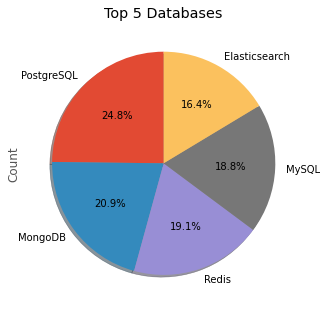

In [ ]:
df2=pd.read_sql_query(QUERY,conn)
df2.set_index('DatabaseDesireNextYear',inplace=True)
df2

df2['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
plt.title("Top 5 Databases")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


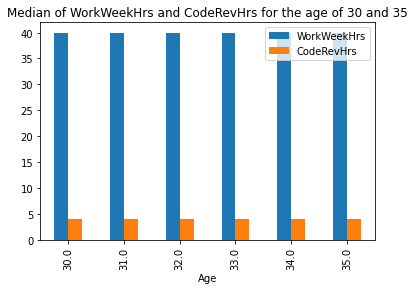

In [ ]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE Age BETWEEN 30 and 35
"""

df3 = pd.read_sql_query(QUERY, conn)
df3

df_median = df3.groupby(df3.Age)[['WorkWeekHrs','CodeRevHrs']].median()
df_median

df_median.plot(kind='bar')
plt.title('Median of WorkWeekHrs and CodeRevHrs for the age of 30 and 35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


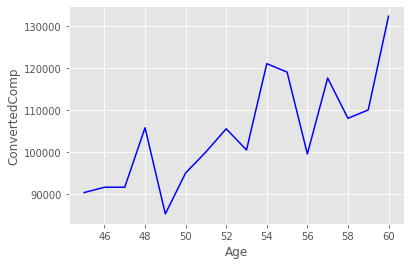

In [ ]:
# your code goes here

QUERY = """
SELECT ConvertedComp, Age FROM master where Age BETWEEN 45 and 60
"""

df4 = pd.read_sql_query(QUERY, conn)
df_median_ConvertedComp = df4.groupby(df4.Age)['ConvertedComp'].median()

df_median_ConvertedComp .plot(kind='line', color ='blue')
plt.ylabel('ConvertedComp')
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


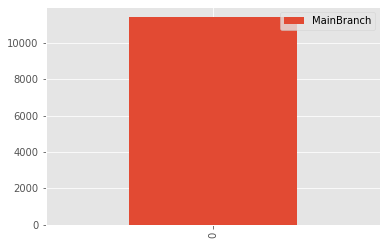

In [ ]:
# your code goes here

QUERY = """
SELECT MainBranch,COUNT(*)as MainBranch FROM master"""

df5 = pd.read_sql_query(QUERY, conn)
df5.head()

df5.plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Top 10 Languages Developers Desire to learn next Year')

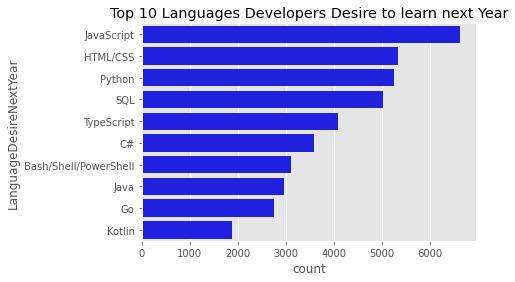

In [ ]:
import seaborn as sns

QUERY = """
SELECT l.LanguageDesireNextYear, count(m.respondent)as count FROM master as m join LanguageDesireNextYear as l 
on m.respondent = l.respondent
group by l.LanguageDesireNextYear
order by count(m.respondent) desc
"""

df5 = pd.read_sql_query(QUERY, conn)
df10 = df5.head(10)

sns.barplot(x='count', y='LanguageDesireNextYear', data=df10, orient='h', color='blue')
plt.title('Top 10 Languages Developers Desire to learn next Year')



Text(0.5, 1.0, 'Top 10 Languages Developers Use')

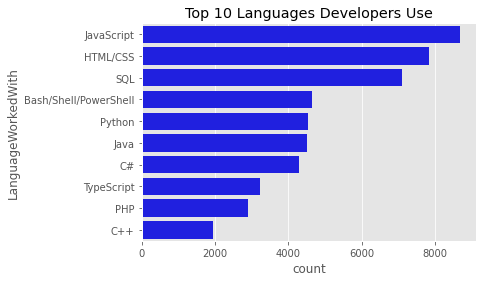

In [ ]:
import seaborn as sns

QUERY = """
SELECT l.LanguageWorkedWith, count(m.respondent)as count FROM master as m join LanguageWorkedWith as l 
on m.respondent = l.respondent
group by l.LanguageWorkedWith
order by count(m.respondent) desc
"""

df5 = pd.read_sql_query(QUERY, conn)
df10 = df5.head(10)

sns.barplot(x='count', y='LanguageWorkedWith', data=df10, orient='h', color='blue')
plt.title('Top 10 Languages Developers Use')


Top 10 Databases Developers Use

Text(0.5, 1.0, 'Top 10 Databases Developers Use')

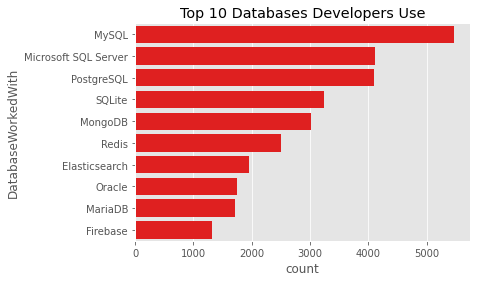

In [ ]:


QUERY = """
SELECT d.DatabaseWorkedWith, count(m.respondent)as count FROM master as m join DatabaseWorkedWith as d 
on m.respondent = d.respondent
group by d.DatabaseWorkedWith
order by count(m.respondent) desc
"""

df5 = pd.read_sql_query(QUERY, conn)
df10 = df5.head(10)

sns.barplot(x='count', y='DatabaseWorkedWith', data=df10, orient='h', color='red')
plt.title('Top 10 Databases Developers Use')


Top 10 Databases Developers Desire To Learn Next Year

Close the database connection.


Text(0.5, 1.0, 'Top 10 Databases Developers Desire To Learn Next Year')

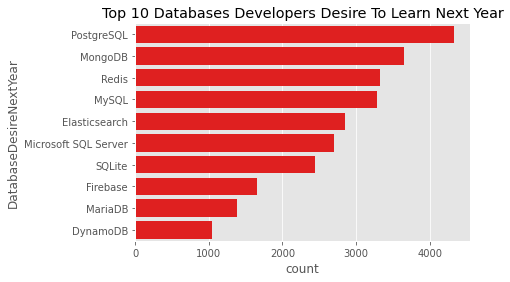

In [ ]:
QUERY = """
SELECT d.DatabaseDesireNextYear, count(m.respondent)as count FROM master as m join DatabaseDesireNextYear as d 
on m.respondent = d.respondent
group by d.DatabaseDesireNextYear
order by count(m.respondent) desc
"""

df5 = pd.read_sql_query(QUERY, conn)
df10 = df5.head(10)

sns.barplot(x='count', y='DatabaseDesireNextYear', data=df10, orient='h', color='red')
plt.title('Top 10 Databases Developers Desire To Learn Next Year')


In [ ]:
QUERY = """
SELECT l.LanguageWorkedWith, avg(m.ConvertedComp)as sum FROM master as m join LanguageWorkedWith as l 
on m.respondent = l.respondent
group by l.LanguageWorkedWith
order by m.ConvertedComp desc
"""
pd.read_sql_query(QUERY,conn)
df5 = pd.read_sql_query(QUERY, conn)
df5.head(10)

,LanguageWorkedWith,sum
0,VBA,134904.261168
1,F#,189661.391892
2,Clojure,231394.093333
3,Assembly,102332.500000
4,Other(s):,155395.866330
5,Erlang,131220.044944
6,C#,134098.387170
7,Java,123083.430230
8,JavaScript,132209.656681
9,SQL,131444.774174


In [ ]:
.conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
